# 栈和队列
## 栈

进栈出栈

In [1]:
from queue import LifoQueue
 
stack = LifoQueue() 
for i in range(5):
    stack.put(i) #进栈
 
for i in range(5):
    print(stack._get()) #出栈

4
3
2
1
0


In [4]:
stack.empty(),stack._get()

IndexError: pop from empty list

# 队列

In [5]:
from queue import Queue
q = Queue()
for i in range(5):
    q.put(i)
for i in range(5):
    print(q.get())

0
1
2
3
4


# 1 有效括号

给定一个只包括 '('，')'，'{'，'}'，'['，']' 的字符串 s ，判断字符串是否有效。

有效字符串需满足：

左括号必须用相同类型的右括号闭合。
左括号必须以正确的顺序闭合。
每个右括号都有一个对应的相同类型的左括号。

In [7]:
class Solution(object):
    def isValid(self, s):
        """
        :type s: str
        :rtype: bool
        """
        stack = []
        for i in s:
            if i == '(':
                stack.append(')')
            elif i == '[':
                stack.append(']')
            elif i == '{':
                stack.append('}')
            elif stack and i == stack[-1]:
                stack.pop()
            else:
                return False
        return not stack
sol = Solution()
sol.isValid(s = "()[]{}")

False

# 2 150  逆波兰表达式求值

给你一个字符串数组 tokens ，表示一个根据 逆波兰表示法 表示的算术表达式。

请你计算该表达式。返回一个表示表达式值的整数。

注意：

有效的算符为 '+'、'-'、'*' 和 '/' 。
每个操作数（运算对象）都可以是一个整数或者另一个表达式。
两个整数之间的除法总是 向零截断 。
表达式中不含除零运算。
输入是一个根据逆波兰表示法表示的算术表达式。
答案及所有中间计算结果可以用 32 位 整数表示。
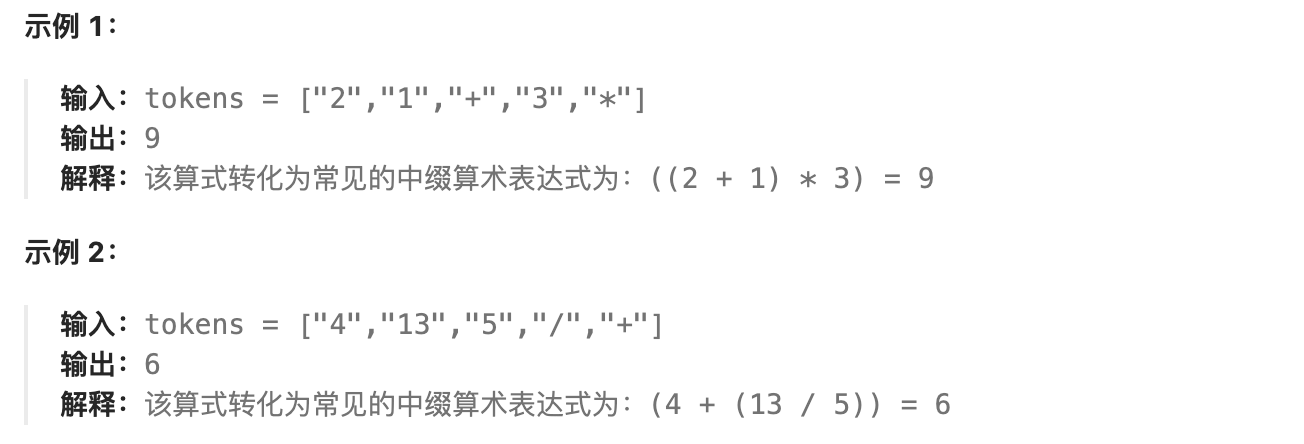

In [17]:
class Solution(object):
    def evalRPN(self, tokens):
        """
        :type tokens: List[str]
        :rtype: int
        """
        stack = []
        captions = ['+','-','*','/']
        for i in tokens:
            if i in captions:
                b = stack.pop()
                a = stack.pop()
                if i == '+':
                    stack.append(a+b)
                elif i == '-':
                    stack.append(a-b)
                elif i == '*':
                    stack.append(int(a*b))
                else:
                    stack.append(int(a/b))
                continue
            stack.append(int(i))
        return stack[0]
slo = Solution()
tokens = ["10","6","9","3","+","-11","*","/","*","17","+","5","+"]

slo.evalRPN(tokens)

22

# 滑动窗口最大值 _不会写——（TODO）


In [ ]:
class Solution(object):
    def maxSlidingWindow(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        max_res = []
        windows = nums[0:k]
        max_val = max(windows)
        left = 0
        right = k
        while right < len(nums):
            if nums[right] > max_val:
                max_val = nums[right]
                left = right - k + 1
                max_res.append(max_val)
                windows = nums[left:right+1]
                max_val = max(windows)
            right += 1
            

nums = [1,3,-1,-3,5,3,6,7]
k = 3
sol = Solution()
sol.maxSlidingWindow(nums,k)

# 前K个高频元素
给你一个整数数组 nums 和一个整数 k ，请你返回其中出现频率前 k 高的元素。你可以按 任意顺序 返回答案。

k出现的次数
set dict +=1 sort

In [2]:
class Solution(object):
    def topKFrequent(self, nums, k):
        """
        :type nums: List[int]
        :type k: int
        :rtype: List[int]
        """
        dict_ = {i:0 for i in set(nums)}
        for i in nums:
            dict_[i] += 1
        sorted_keys = sorted(dict_, key=dict_.get)
        return sorted_keys[-k:]

s = Solution()
s.topKFrequent([1,1,1,2,2,3,3,3,3,3,3,4,4,4,4,4,4], 2)

[3, 4]

# 接雨水
<img src=https://assets.leetcode-cn.com/aliyun-lc-upload/uploads/2018/10/22/rainwatertrap.png width=60% />

输入：height = [0,1,0,2,1,0,1,3,2,1,2,1]
输出：6
解释：上面是由数组 [0,1,0,2,1,0,1,3,2,1,2,1] 表示的高度图，在这种情况下，可以接 6 个单位的雨水（蓝色部分表示雨水）。 

In [20]:
class Solution(object):
    def trap(self, height):
        """
        :type height: List[int]
        :rtype: int
        """
        kongqi=0
        # 从左到右找顶峰
        n=0
        left = 0
        while left<len(height) and  height[left] == 0:
            left+=1 
            n+=1
        max_val = (len(height)-n)*max(height)

        right = left
        kongqi_list = []

        while left<len(height) and right < len(height) and height[right]<max(height):
            if height[left] > height[right]:
                pass
            else:
                left=right
            kongqi += max(height) - height[left]
            kongqi_list.append(max(height) - height[left])
            right+=1
        index_1 = right-1
        # 从右到左找顶峰
        height = height[::-1]
        left = 0
        while left<len(height) and height[left] == 0:
            left+=1 
        right = left
        kongqi_list_2 = []

        while left<len(height) and right < len(height) and height[right]<max(height):
            if height[left] > height[right]:
                pass
            else:
                left=right
            kongqi += max(height) - height[left]
            kongqi_list_2.append(max(height) - height[left])
            right+=1

        print(kongqi_list_2)
        index_2 = max(len(height) - right-1,0)
        if index_2 +index_1 == len(height)+1:
            return max_val - kongqi-sum(height)
        else:
            kongqi_list_3 = []
            for i in range(index_1, len(height)-index_2):
                kongqi += max(height)-height[i]
                kongqi_list_3.append(max(height)-height[i])
            return max_val - kongqi-sum(height)
        
                
sol = Solution()
sol.trap([0,2,0])

[]


0